In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from prophet import Prophet

In [ ]:
# Load your CSV
df = pd.read_csv('garmin_summary.csv', parse_dates=['calendarDate'])
df.set_index('calendarDate', inplace=True)


# Basic Metrics

In [ ]:
# Rolling averages for Resting Heart Rate (RHR)
df['RHR_7d_avg'] = df['restingHeartRate'].rolling(window=7, min_periods=3).mean()
df['RHR_14d_avg'] = df['restingHeartRate'].rolling(window=14, min_periods=7).mean()

# Step goal completion percentage
df['step_goal_pct'] = df['totalSteps'] / df['dailyStepGoal'] * 100

In [ ]:
# Basic summary metrics
avg_rhr = df['restingHeartRate'].mean()
total_distance_km = df['totalDistanceMeters'].sum() / 1000  # convert meters to kilometers
days_recorded = df['restingHeartRate'].count()  # number of non-NaN days recorded

# Additional useful metrics
max_rhr = df['restingHeartRate'].max()
min_rhr = df['restingHeartRate'].min()
avg_steps = df['totalSteps'].mean()
total_steps = df['totalSteps'].sum()
days_with_steps = df['totalSteps'].gt(0).sum()  # count days with steps > 0
stress = df['averageStressLevel'].mean()  

print(f"Average Resting Heart Rate: {avg_rhr:.1f} BPM")
print(f"Max Resting Heart Rate: {max_rhr:.1f} BPM")
print(f"Min Resting Heart Rate: {min_rhr:.1f} BPM")
print(f"Total Distance Walked: {total_distance_km:.1f} km")
print(f"Average Steps per Day: {avg_steps:.0f}")
print(f"Total Steps: {total_steps:,}")
print(f"Days Recorded: {days_recorded}")
print(f"Days With Steps Recorded: {days_with_steps}")
print(f"Days With Steps Recorded: {stress}")


Average Resting Heart Rate: 63.5 BPM
Max Resting Heart Rate: 77.0 BPM
Min Resting Heart Rate: 53.0 BPM
Total Distance Walked: 7076.4 km
Average Steps per Day: 8893
Total Steps: 7,754,827.0
Days Recorded: 842
Days With Steps Recorded: 872
Days With Steps Recorded: 29.30976430976431


In [86]:
# Filter data for 2025 only
df_2025 = df[df.index.year == 2025]

# Calculate metrics for 2025
avg_rhr_2025 = df_2025['restingHeartRate'].mean()
total_distance_km_2025 = df_2025['totalDistanceMeters'].sum() / 1000  # meters to km
days_recorded_2025 = df_2025['restingHeartRate'].count()

max_rhr_2025 = df_2025['restingHeartRate'].max()
min_rhr_2025 = df_2025['restingHeartRate'].min()
avg_steps_2025 = df_2025['totalSteps'].mean()
total_steps_2025 = df_2025['totalSteps'].sum()
days_with_steps_2025 = df_2025['totalSteps'].gt(0).sum()

print(f"--- Metrics for 2025 ---")
print(f"Average Resting Heart Rate: {avg_rhr_2025:.1f} BPM")
print(f"Max Resting Heart Rate: {max_rhr_2025:.1f} BPM")
print(f"Min Resting Heart Rate: {min_rhr_2025:.1f} BPM")
print(f"Total Distance Walked: {total_distance_km_2025:.1f} km")
print(f"Average Steps per Day: {avg_steps_2025:.0f}")
print(f"Total Steps: {total_steps_2025:,}")
print(f"Days Recorded: {days_recorded_2025}")
print(f"Days With Steps Recorded: {days_with_steps_2025}")


--- Metrics for 2025 ---
Average Resting Heart Rate: 60.0 BPM
Max Resting Heart Rate: 70.0 BPM
Min Resting Heart Rate: 53.0 BPM
Total Distance Walked: 2154.2 km
Average Steps per Day: 10318
Total Steps: 2,208,083.0
Days Recorded: 212
Days With Steps Recorded: 214


In [ ]:


# Filter data for 2025 only
df_2025 = df[df.index.year != 2025]

# Calculate metrics for 2025
avg_rhr_2025 = df_2025['restingHeartRate'].mean()
total_distance_km_2025 = df_2025['totalDistanceMeters'].sum() / 1000  # meters to km
days_recorded_2025 = df_2025['restingHeartRate'].count()

max_rhr_2025 = df_2025['restingHeartRate'].max()
min_rhr_2025 = df_2025['restingHeartRate'].min()
avg_steps_2025 = df_2025['totalSteps'].mean()
total_steps_2025 = df_2025['totalSteps'].sum()
days_with_steps_2025 = df_2025['totalSteps'].gt(0).sum()

print(f"--- Metrics for Before 2025 ---")
print(f"Average Resting Heart Rate: {avg_rhr_2025:.1f} BPM")
print(f"Max Resting Heart Rate: {max_rhr_2025:.1f} BPM")
print(f"Min Resting Heart Rate: {min_rhr_2025:.1f} BPM")
print(f"Total Distance Walked: {total_distance_km_2025:.1f} km")
print(f"Average Steps per Day: {avg_steps_2025:.0f}")
print(f"Total Steps: {total_steps_2025:,}")
print(f"Days Recorded: {days_recorded_2025}")
print(f"Days With Steps Recorded: {days_with_steps_2025}")

--- Metrics for 2025 ---
Average Resting Heart Rate: 64.7 BPM
Max Resting Heart Rate: 77.0 BPM
Min Resting Heart Rate: 54.0 BPM
Total Distance Walked: 4922.1 km
Average Steps per Day: 8430
Total Steps: 5,546,744.0
Days Recorded: 630
Days With Steps Recorded: 658


# Visualizations 2023-2025

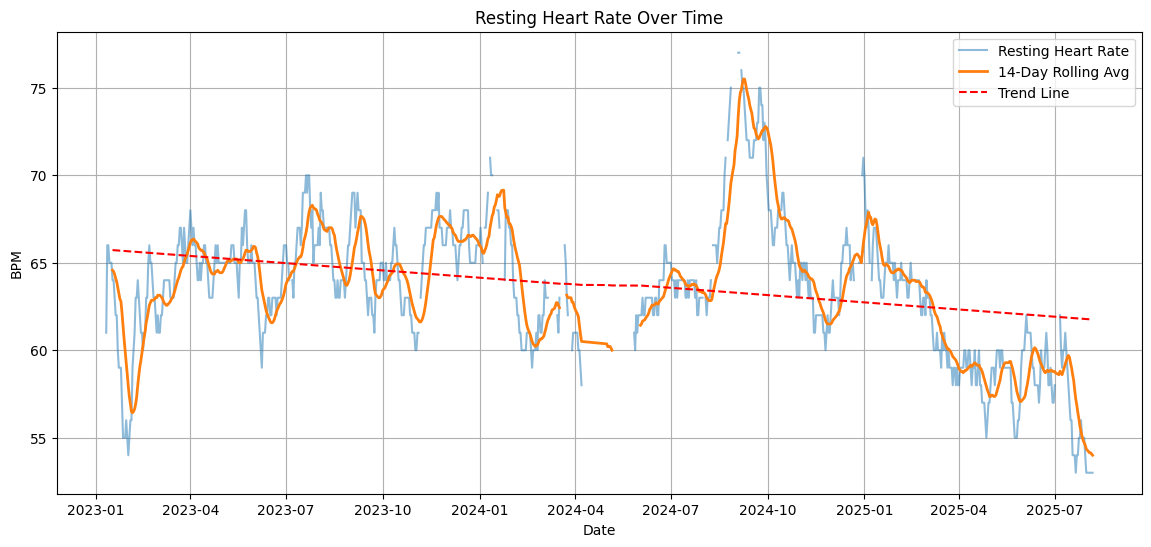

In [77]:

plt.figure(figsize=(14,6))

# Plot resting heart rate and rolling averages
plt.plot(df.index, df['restingHeartRate'], label='Resting Heart Rate', alpha=0.5)
plt.plot(df.index, df['RHR_14d_avg'], label='14-Day Rolling Avg', linewidth=2)

# Prepare data for trend line (use the rolling average to smooth noise)
valid_data = df['RHR_14d_avg'].dropna()
x = np.arange(len(valid_data))
y = valid_data.values

# Fit linear trend line
slope, intercept = np.polyfit(x, y, 1)
trend_line = slope * x + intercept

# Plot trend line
plt.plot(valid_data.index, trend_line, color='red', linestyle='--', label='Trend Line')

plt.title('Resting Heart Rate Over Time')
plt.ylabel('BPM')
plt.xlabel('Date')
plt.legend()
plt.grid(True)
plt.show()


13:40:14 - cmdstanpy - INFO - Chain [1] start processing
13:40:14 - cmdstanpy - INFO - Chain [1] done processing


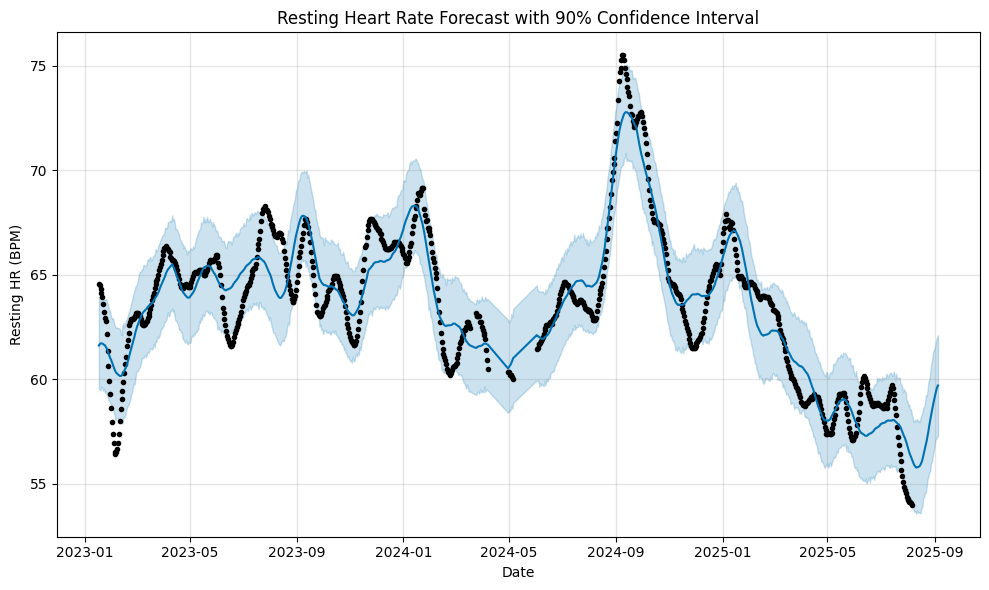

On 2025-09-05, resting HR is forecasted to be 59.7 BPM
With 90% confidence, it will be between 57.3 and 62.1 BPM


In [79]:

# Use 2025 data with rolling average to smooth things
df_prophet = df[['RHR_14d_avg']].dropna().reset_index()

# Rename for Prophet
df_prophet.columns = ['ds', 'y']

# Create and fit model
model = Prophet(interval_width=0.90)  # 90% confidence interval
model.fit(df_prophet)

# Create future dates for next 30 days
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)


# Plot forecast
fig = model.plot(forecast)
plt.title("Resting Heart Rate Forecast with 90% Confidence Interval")
plt.ylabel("Resting HR (BPM)")
plt.xlabel("Date")
plt.grid(True)
plt.tight_layout()
plt.show()

# Let's say you want the forecast for 30 days from now
target_date = forecast['ds'].iloc[-1]
row = forecast[forecast['ds'] == target_date]

yhat = row['yhat'].values[0]
lower = row['yhat_lower'].values[0]
upper = row['yhat_upper'].values[0]

print(f"On {target_date.date()}, resting HR is forecasted to be {yhat:.1f} BPM")
print(f"With 90% confidence, it will be between {lower:.1f} and {upper:.1f} BPM")


### Stress Level 
##### Garmin stress levels, ranging from 0-100, indicate your body's physiological stress based on heart rate variability (HRV)

A score of 0-25 signifies a resting state, 26-50 is low stress, 51-75 is medium stress, and 76-100 indicates high stress. This data helps you understand how your body responds to various stressors throughout the day. 

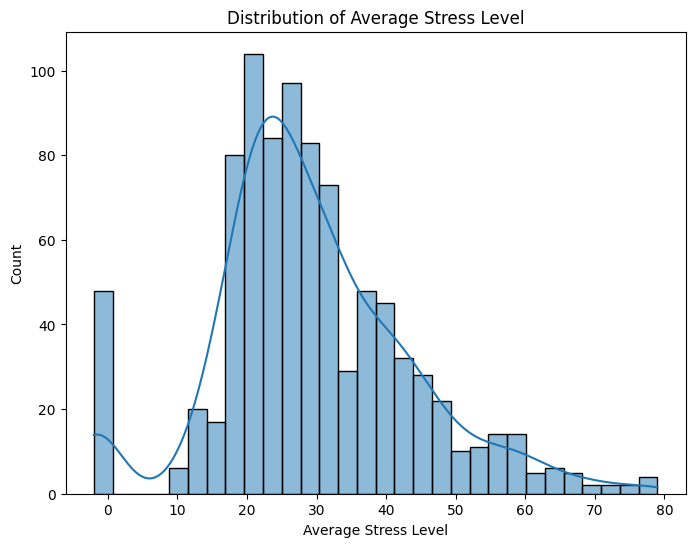

In [6]:
# Stress level distribution
plt.figure(figsize=(8,6))
sns.histplot(df['averageStressLevel'], bins=30, kde=True)
plt.title('Distribution of Average Stress Level')
plt.xlabel('Average Stress Level')
plt.show()

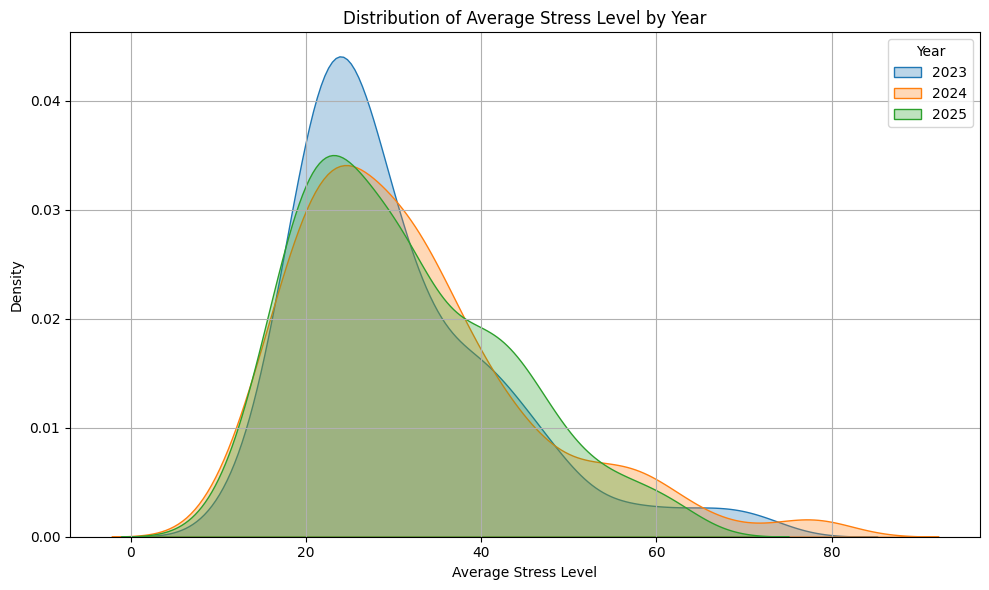

In [98]:
df = df[(df['averageStressLevel'] > 0) & (df['averageStressLevel'] <= 100)]

# Ensure 'date' column is datetime and set as index if not already
df['year'] = df.index.year  # Or df['date'].dt.year if 'date' is a column

plt.figure(figsize=(10, 6))

# Plot KDE for each year
for year in sorted(df['year'].unique()):
    yearly_data = df[df['year'] == year]['averageStressLevel']
    sns.kdeplot(yearly_data, label=str(year), fill=True, alpha=0.3)

plt.title('Distribution of Average Stress Level by Year')
plt.xlabel('Average Stress Level')
plt.ylabel('Density')
plt.legend(title='Year')
plt.grid(True)
plt.tight_layout()
plt.show()


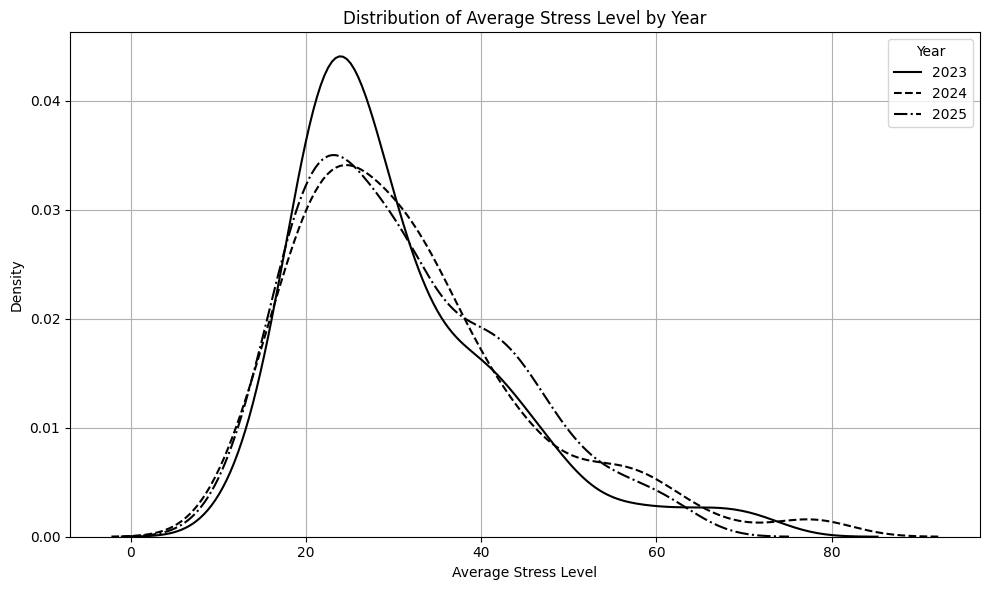

In [103]:
import itertools

line_styles = ['-', '--', '-.', ':']
style_cycle = itertools.cycle(line_styles)

plt.figure(figsize=(10, 6))

for year in sorted(df['year'].unique()):
    yearly_data = df[df['year'] == year]['averageStressLevel']
    sns.kdeplot(
        yearly_data,
        label=str(year),
        linestyle=next(style_cycle),
        color='black'  # all black for B&W
    )

plt.title('Distribution of Average Stress Level by Year')
plt.xlabel('Average Stress Level')
plt.ylabel('Density')
plt.legend(title='Year')
plt.grid(True)
plt.tight_layout()
plt.show()


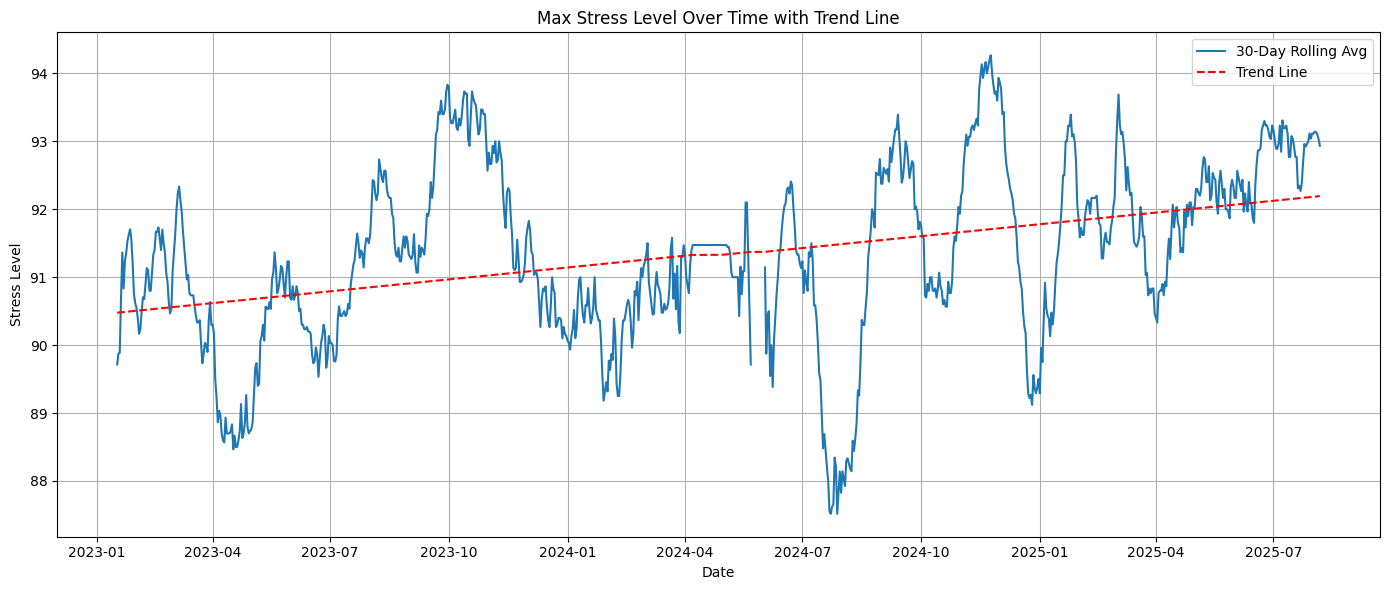

In [ ]:

# Your original rolling average
rolling_avg = df['maxStressLevel'].rolling(window=30, min_periods=7).mean()

# Drop NaN values (from the rolling mean) for fitting the trend line
valid_data = rolling_avg.dropna()
x = np.arange(len(valid_data))
y = valid_data.values

# Fit a linear trend line
slope, intercept = np.polyfit(x, y, 1)
trend_line = slope * x + intercept

# Plot
plt.figure(figsize=(14, 6))
plt.plot(df.index, rolling_avg, label='30-Day Rolling Avg')

plt.plot(valid_data.index, trend_line, color='red', linestyle='--', label='Trend Line')

plt.title('Max Stress Level Over Time with Trend Line')
plt.ylabel('Stress Level')
plt.xlabel('Date')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [30]:
start_val = valid_data.iloc[0]
end_val = valid_data.iloc[-1]
change = end_val - start_val
print(f"Trend line shows a gradual increase of {slope:.3f}")
print(f"The trend line starting point: {start_val:.1f}, End: {end_val:.1f}, Change: {change:.1f}")


Trend line shows a gradual increase of 0.002
The trend line starting point: 89.7, End: 92.9, Change: 3.2


In [23]:
max_val = valid_data.max()
min_val = valid_data.min()
max_date = valid_data.idxmax()
min_date = valid_data.idxmin()
print(f"Stress peaked at {max_val:.1f} on {max_date.date()} and was lowest at {min_val:.1f} on {min_date.date()}.")


Stress peaked at 94.3 on 2024-11-24 and was lowest at 87.5 on 2024-07-23.


In [45]:


# Create a weekly HRV DataFrame: STD of resting heart rate per week
weekly_hrv = df.resample('W')['restingHeartRate'].std().dropna().rename('HRV')



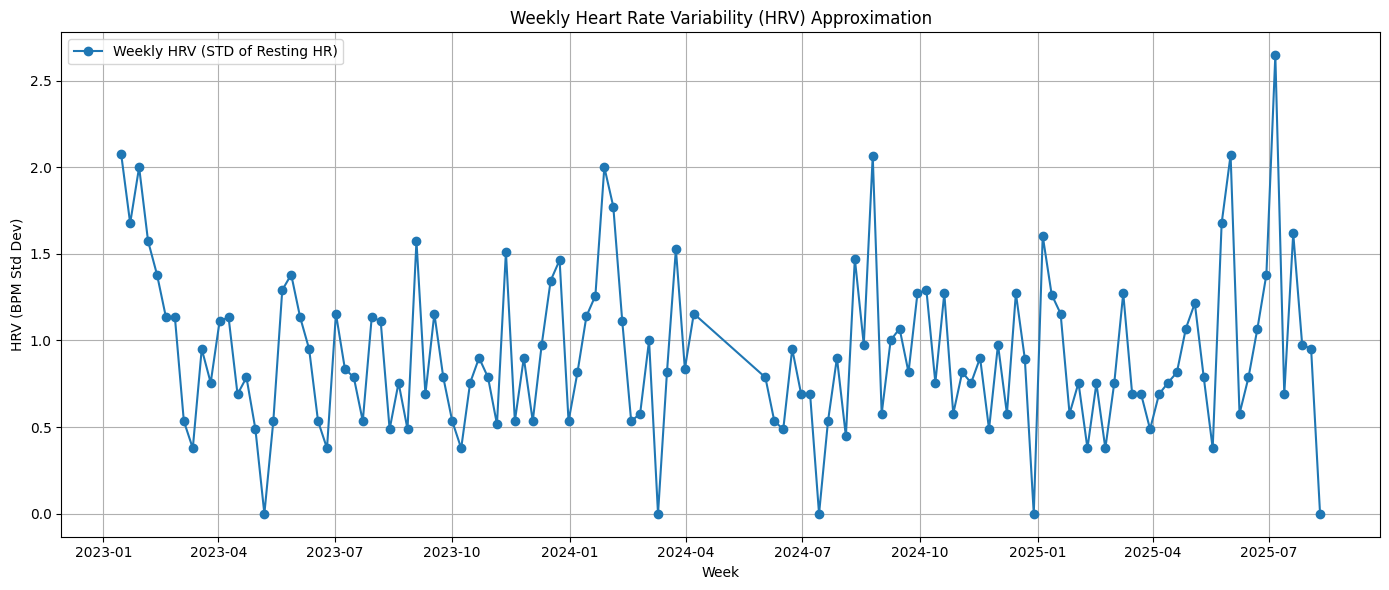

In [46]:

plt.figure(figsize=(14,6))
plt.plot(weekly_hrv.index, weekly_hrv, marker='o', linestyle='-', label='Weekly HRV (STD of Resting HR)')
plt.title('Weekly Heart Rate Variability (HRV) Approximation')
plt.xlabel('Week')
plt.ylabel('HRV (BPM Std Dev)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


This graph shows how much resting heart rate changed from day to day, averaged by week. When the numbers are higher, it means heart rate was more variable — which can be a sign that the body is adapting well to stress and recovering properly. When the numbers are lower, it means your heart rate was more consistent — which can happen when you're tired, stressed, or overworked.

Overall HRV shows moderate variability, which is good. There is no indicating trend. 


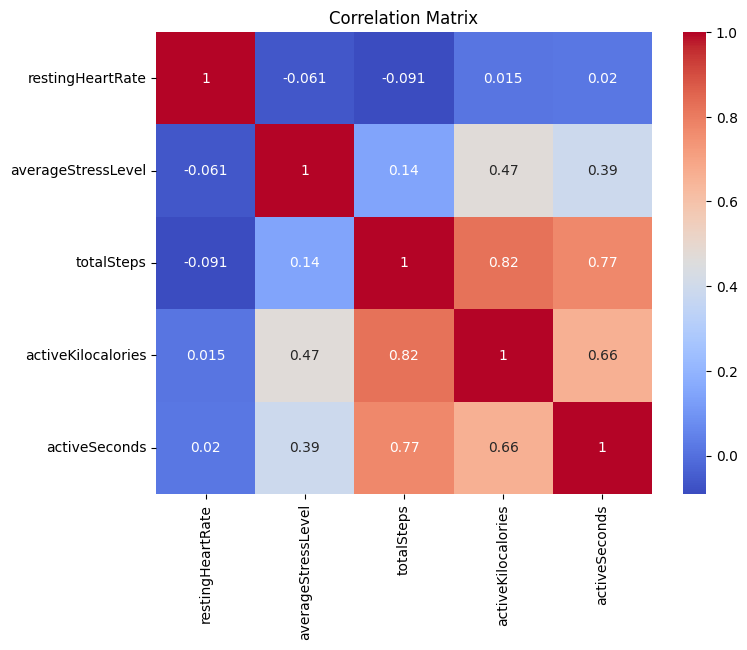

In [20]:


# Correlation heatmap of key columns
cols = ['restingHeartRate', 'averageStressLevel', 'totalSteps', 'activeKilocalories', 'activeSeconds']
plt.figure(figsize=(8,6))
sns.heatmap(df[cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


| Metric 1             | Metric 2             | Correlation | What it means                                                                                                                                                                         |
| -------------------- | -------------------- | ----------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| Resting Heart Rate   | Average Stress Level | -0.06       | Almost no relationship, very weak negative correlation (stress and resting HR move slightly opposite but barely).                                                                     |
| Resting Heart Rate   | Total Steps          | -0.09       | Very weak negative correlation; slightly more steps tend to be associated with a slightly lower resting heart rate, but effect is minimal.                                            |
| Resting Heart Rate   | Active Kilocalories  | 0.01        | Essentially no correlation.                                                                                                                                                           |
| Average Stress Level | Total Steps          | 0.14        | Weak positive correlation; more steps tend to relate to slightly higher average stress, but weak.                                                                                     |
| Average Stress Level | Active Kilocalories  | 0.47        | Moderate positive correlation; higher physical activity (calories burned) tends to relate to higher average stress levels. This may mean active days can sometimes be more stressful. |
| Total Steps          | Active Kilocalories  | 0.82        | Strong positive correlation; more steps closely correspond to more calories burned — makes sense because more walking/movement burns calories.                                        |
| Active Kilocalories  | Active Seconds       | 0.66        | Moderate to strong positive correlation; more active time relates to more calories burned.                                                                                            |


#### Summary:
* Resting heart rate doesn’t seem strongly connected to the other variables here.

* Steps and active calories are strongly related — when you take more steps, you burn more calories.

* Average stress level is somewhat higher on days with more activity, possibly because active days can be more demanding or stressful.

* Most relationships are weak to moderate, showing how complex health data often is.

# Visualizations 2025

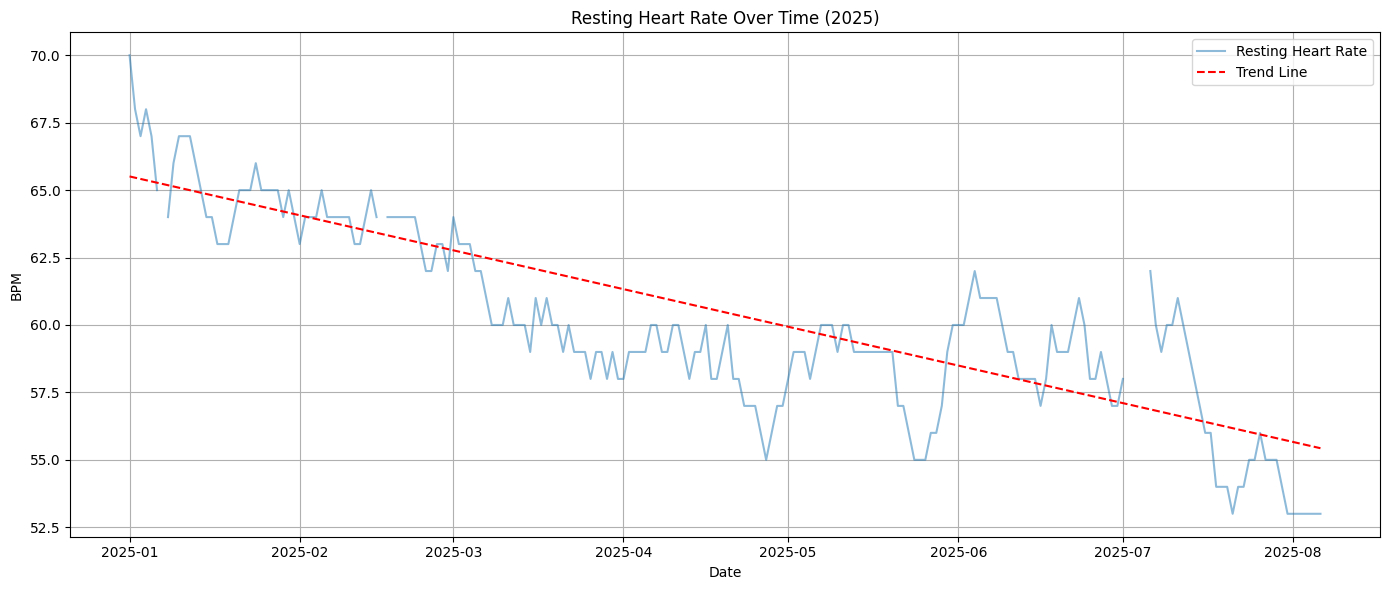

In [66]:

# Filter for only 2025 data
df_2025 = df[df.index.year == 2025]

# Get the 14-day rolling average, dropping NaNs
rolling_avg = df_2025['RHR_14d_avg'].dropna()

# Prepare x (as sequential integers) and y (values of the rolling average)
x = np.arange(len(rolling_avg))
y = rolling_avg.values

# Fit a linear trend line
slope, intercept = np.polyfit(x, y, 1)
trend_line = slope * x + intercept

# Plot for 2025 with trend line
plt.figure(figsize=(14, 6))
plt.plot(df_2025.index, df_2025['restingHeartRate'], label='Resting Heart Rate', alpha=0.5)
# plt.plot(rolling_avg.index, rolling_avg, label='14-Day Rolling Avg', linewidth=2)
plt.plot(rolling_avg.index, trend_line, color='red', linestyle='--', label='Trend Line')

plt.title('Resting Heart Rate Over Time (2025)')
plt.ylabel('BPM')
plt.xlabel('Date')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



In [80]:

# Use 2025 data with rolling average to smooth things
df_prophet = df[df.index.year == 2025][['RHR_14d_avg']].dropna().reset_index()

# Rename for Prophet
df_prophet.columns = ['ds', 'y']


In [81]:
# Create and fit model
model = Prophet(interval_width=0.90)  # 90% confidence interval
model.fit(df_prophet)

# Create future dates for next 30 days
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)


13:41:00 - cmdstanpy - INFO - Chain [1] start processing
13:41:00 - cmdstanpy - INFO - Chain [1] done processing


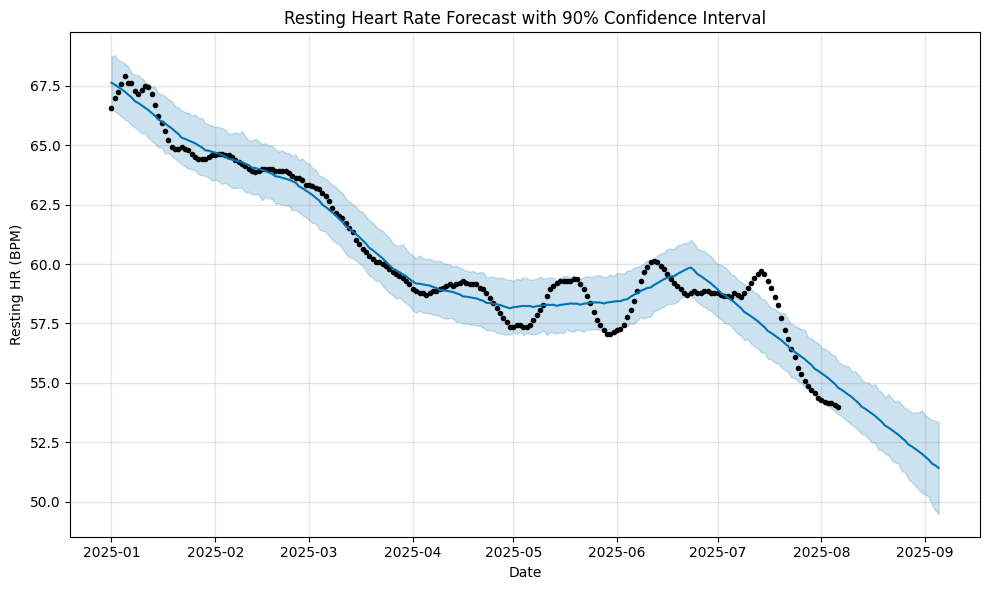

In [82]:

# Plot forecast
fig = model.plot(forecast)
plt.title("Resting Heart Rate Forecast with 90% Confidence Interval")
plt.ylabel("Resting HR (BPM)")
plt.xlabel("Date")
plt.grid(True)
plt.tight_layout()
plt.show()


In [83]:
# Let's say you want the forecast for 30 days from now
target_date = forecast['ds'].iloc[-1]
row = forecast[forecast['ds'] == target_date]

yhat = row['yhat'].values[0]
lower = row['yhat_lower'].values[0]
upper = row['yhat_upper'].values[0]

print(f"On {target_date.date()}, resting HR is forecasted to be {yhat:.1f} BPM")
print(f"With 90% confidence, it will be between {lower:.1f} and {upper:.1f} BPM")


On 2025-09-05, resting HR is forecasted to be 51.4 BPM
With 90% confidence, it will be between 49.5 and 53.3 BPM


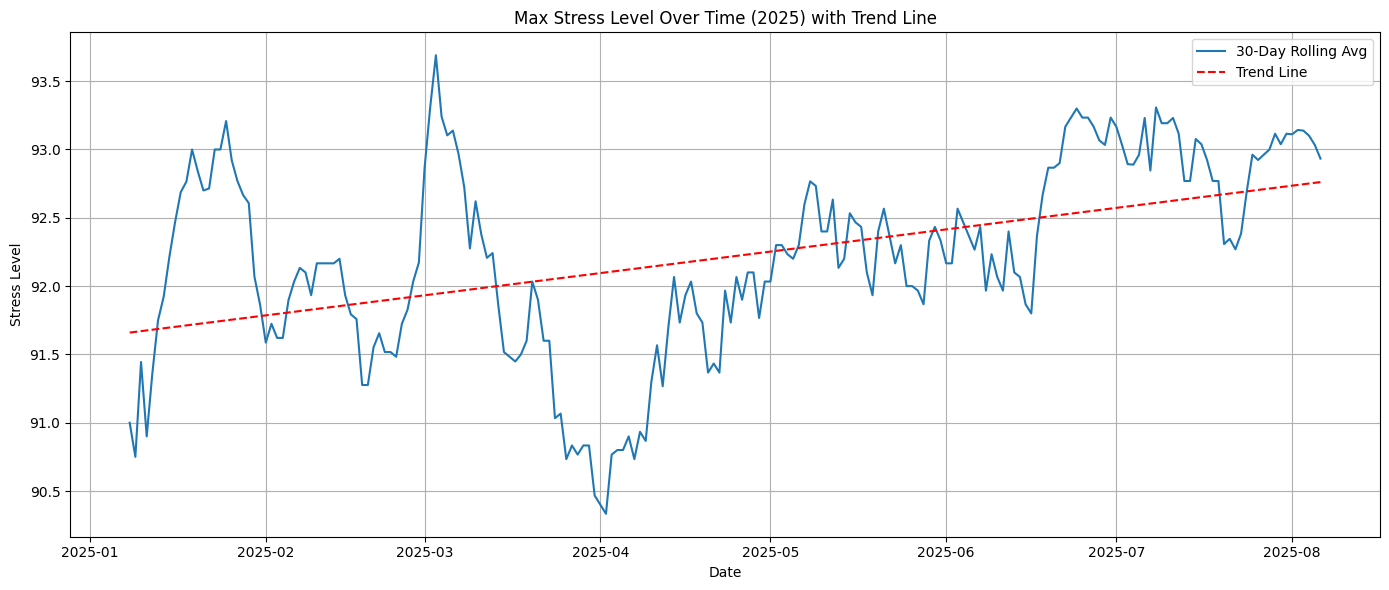

In [84]:

# Filter data to just 2025
df_2025 = df[df.index.year == 2025]

# Rolling average on 2025 data
rolling_avg = df_2025['maxStressLevel'].rolling(window=30, min_periods=7).mean()

# Drop NaN values for fitting the trend line
valid_data = rolling_avg.dropna()
x = np.arange(len(valid_data))
y = valid_data.values

# Fit a linear trend line
slope, intercept = np.polyfit(x, y, 1)
trend_line = slope * x + intercept

# Plot
plt.figure(figsize=(14, 6))
plt.plot(df_2025.index, rolling_avg, label='30-Day Rolling Avg')
plt.plot(valid_data.index, trend_line, color='red', linestyle='--', label='Trend Line')

plt.title('Max Stress Level Over Time (2025) with Trend Line')
plt.ylabel('Stress Level')
plt.xlabel('Date')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
